In [78]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 110


In [79]:
byCategory=pd.read_csv('0619byCategory.csv')

In [80]:
byCategory[byCategory.business_hour_guid=='3931EA2A-85CB-4727-BCCB-238971C60C80']

,business_hour_guid,subtotal,buying_date,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,code,parent_code,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,guid_subtotal,is_Discount,hottimes
48,3931EA2A-85CB-4727-BCCB-238971C60C80,289.0,2014-01-02,1180.0,289.0,1.0,0,0,0,0.0,0,567.0,473.0,1,12,3,5,0,2014,289.0,0,270.0,1.07,22542.0,1,0


In [81]:
byCategory['unit_price']=byCategory['item_price']/byCategory['quantity_multiplier']

In [82]:
df=byCategory
df.shape

(250169, 26)

In [83]:
#發現 code,category_unit_price,compare_cate_unit_price 有nan值 因為分類關係
df.code=df.code.fillna(0)
df.shippingdate=df.shippingdate.fillna(0)
df.parent_code=df.parent_code.fillna(0)
df.isna().sum()

business_hour_guid            0
subtotal                      0
buying_date                   0
item_orig_price               0
item_price                    0
quantity_multiplier           0
installment_3months           0
installment_6months           0
installment_12months          0
shippingdate                  0
enable_isp                    0
code                          0
parent_code                   0
product_launch_month          0
product_launch_hour           0
product_launch_weekday        0
order_deliver_days            0
is_Presales                   0
product_launch_year           0
unit_price                    0
is_Longtern                   0
category_unit_price        3901
compare_cate_unit_price    3901
guid_subtotal                 0
is_Discount                   0
hottimes                      0
dtype: int64

In [84]:
df['category_unit_price']=df['category_unit_price'].fillna(df['unit_price'])

In [85]:
df['compare_cate_unit_price']=df['compare_cate_unit_price'].fillna(1)

## 將檔案順序打散

In [86]:
df=df.sample(frac=1, replace=False, random_state=0)

In [87]:
df=df.reset_index(drop=True)


將資料分為輸入變數與目標變數

In [88]:
##加入code相關特徵
code_beforedays=pd.read_csv('code_beforedays.csv')
code_beforedays.head(3)

,buying_date,code,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days
0,2013-12-31,222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8070.488153,598401.0,79.0,2097.5,10245.327628,1129115.0,79.0,2472.0,12068.105808,1592142.0,79.0,2896.0,12864.913523,1592142.0,79.0,2990.0,13805.016282,1592142.0,79.0,3387.0
1,2014-01-01,222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8070.488153,598401.0,79.0,2097.5,10245.327628,1129115.0,79.0,2472.0,12068.105808,1592142.0,79.0,2896.0,12864.913523,1592142.0,79.0,2990.0,13805.016282,1592142.0,79.0,3387.0
2,2014-01-02,222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8070.488153,598401.0,79.0,2097.5,10245.327628,1129115.0,79.0,2472.0,12068.105808,1592142.0,79.0,2896.0,12864.913523,1592142.0,79.0,2990.0,13805.016282,1592142.0,79.0,3387.0


In [89]:
code_beforedays.shape

(889322, 42)

In [90]:
df.shape

(250169, 26)

In [91]:
df=pd.merge(df,code_beforedays,on=['buying_date','code'])

In [92]:
code=pd.read_csv('code.csv')
code.head(3)

,code,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days
0,166.0,4869.213015,1331900.0,49.0,1575.0,6393.935013,1331900.0,79.0,1799.0,7425.780744,1331900.0,69.0,1996.0,7866.970931,1797840.0,69.0,2090.0,8304.521975,2360820.0,69.0,2248.5
1,2082.0,3759.103107,218790.0,78.0,1550.0,5058.728673,458370.0,78.0,1848.5,6357.477840,812790.0,78.0,2097.0,6727.229074,812790.0,78.0,2232.5,7280.483813,812790.0,78.0,2392.0
2,222.0,8070.488153,598401.0,79.0,2097.5,10245.327628,1129115.0,79.0,2472.0,12068.105808,1592142.0,79.0,2896.0,12864.913523,1592142.0,79.0,2990.0,13805.016282,1592142.0,79.0,3387.0


In [93]:
parent_code=code
parent_code.columns=['parent_code', 'parent_code_mean_7days', 'parent_code_max_7days', 'parent_code_min_7days',
       'parent_code_median_7days', 'parent_code_mean_14days', 'parent_code_max_14days',
       'parent_code_min_14days', 'parent_code_median_14days', 'parent_code_mean_30days',
       'parent_code_max_30days', 'parent_code_min_30days', 'parent_code_median_30days',
       'parent_code_mean_60days', 'parent_code_max_60days', 'parent_code_min_60days',
       'parent_code_median_60days', 'parent_code_mean_180days', 'parent_code_max_180days',
       'parent_code_min_180days', 'parent_code_median_180days']
parent_code.head(3)

,parent_code,parent_code_mean_7days,parent_code_max_7days,parent_code_min_7days,parent_code_median_7days,parent_code_mean_14days,parent_code_max_14days,parent_code_min_14days,parent_code_median_14days,parent_code_mean_30days,parent_code_max_30days,parent_code_min_30days,parent_code_median_30days,parent_code_mean_60days,parent_code_max_60days,parent_code_min_60days,parent_code_median_60days,parent_code_mean_180days,parent_code_max_180days,parent_code_min_180days,parent_code_median_180days
0,166.0,4869.213015,1331900.0,49.0,1575.0,6393.935013,1331900.0,79.0,1799.0,7425.780744,1331900.0,69.0,1996.0,7866.970931,1797840.0,69.0,2090.0,8304.521975,2360820.0,69.0,2248.5
1,2082.0,3759.103107,218790.0,78.0,1550.0,5058.728673,458370.0,78.0,1848.5,6357.477840,812790.0,78.0,2097.0,6727.229074,812790.0,78.0,2232.5,7280.483813,812790.0,78.0,2392.0
2,222.0,8070.488153,598401.0,79.0,2097.5,10245.327628,1129115.0,79.0,2472.0,12068.105808,1592142.0,79.0,2896.0,12864.913523,1592142.0,79.0,2990.0,13805.016282,1592142.0,79.0,3387.0


In [94]:
df=pd.merge(df,parent_code,on='parent_code')

In [95]:
df.parent_code=df.parent_code.apply(lambda x: str(round(x)))
df.code=df.code.apply(lambda x: str(round(x)))

df.head(3)

,business_hour_guid,subtotal,buying_date,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,code,parent_code,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,guid_subtotal,is_Discount,hottimes,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days,parent_code_mean_7days,parent_code_max_7days,parent_code_min_7days,parent_code_median_7days,parent_code_mean_14days,parent_code_max_14days,parent_code_min_14days,parent_code_median_14days,parent_code_mean_30days,parent_code_max_30days,parent_code_min_30days,parent_code_median_30days,parent_code_mean_60days,parent_code_max_60days,parent_code_min_60days,parent_code_median_60days,parent_code_mean_180days,parent_code_max_180days,parent_code_min_180days,parent_code_median_180days
0,B99F5F14-E7A4-4870-AAEB-3017939484EC,1098.0,2016-07-06,2560.0,1098.0,2.0,1,0,0,0.0,0,3066,203,7,7,2,0,0,2016,549.0,1,399.0,1.376,957456.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0
1,80C949A9-52F1-4932-8E92-8B4765CFF9C9,690.0,2016-07-06,790.0,690.0,1.0,1,0,0,0.0,0,3066,203,7,7,2,0,0,2016,690.0,0,399.0,1.729,2070.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0
2,6135FB93-0D19-458F-82B1-1A399E3EDBF7,280.0,2016-07-06,890.0,280.0,1.0,1,1,1,0.0,0,3066,203,7,7,2,0,0,2016,280.0,0,399.0,0.702,1400.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0


## 因為code的類別數較大,故使用計數編碼

In [96]:
parent_code=df.parent_code.value_counts().to_frame()


In [97]:
parent_code=df.parent_code.value_counts().to_frame()
parent_code=parent_code.rename(columns={'parent_code':'parent_code_counts'})
parent_code.index.name='parent_code'

In [98]:
df.code.value_counts().to_frame().reset_index().rename(columns={'code':'code_counts','index':'code'}).to_csv('code_counts.csv',index=False)

In [99]:
parent_code=df.parent_code.value_counts().to_frame()
parent_code=parent_code.rename(columns={'parent_code':'parent_code_counts'})
parent_code.index.name='parent_code'
#code.columns=[['code','code_counts']]
parent_code=parent_code.reset_index(drop=False)
df=pd.merge(df,parent_code,how='left')
df=df.drop(columns=['parent_code'])

df.head(3)

,business_hour_guid,subtotal,buying_date,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,code,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,guid_subtotal,is_Discount,hottimes,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days,parent_code_mean_7days,parent_code_max_7days,parent_code_min_7days,parent_code_median_7days,parent_code_mean_14days,parent_code_max_14days,parent_code_min_14days,parent_code_median_14days,parent_code_mean_30days,parent_code_max_30days,parent_code_min_30days,parent_code_median_30days,parent_code_mean_60days,parent_code_max_60days,parent_code_min_60days,parent_code_median_60days,parent_code_mean_180days,parent_code_max_180days,parent_code_min_180days,parent_code_median_180days,parent_code_counts
0,B99F5F14-E7A4-4870-AAEB-3017939484EC,1098.0,2016-07-06,2560.0,1098.0,2.0,1,0,0,0.0,0,3066,7,7,2,0,0,2016,549.0,1,399.0,1.376,957456.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616
1,80C949A9-52F1-4932-8E92-8B4765CFF9C9,690.0,2016-07-06,790.0,690.0,1.0,1,0,0,0.0,0,3066,7,7,2,0,0,2016,690.0,0,399.0,1.729,2070.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616
2,6135FB93-0D19-458F-82B1-1A399E3EDBF7,280.0,2016-07-06,890.0,280.0,1.0,1,1,1,0.0,0,3066,7,7,2,0,0,2016,280.0,0,399.0,0.702,1400.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616


In [100]:
code=df.code.value_counts().to_frame()
code=code.rename(columns={'code':'code_counts'})
code.index.name='code'
#code.columns=[['code','code_counts']]
code=code.reset_index(drop=False)
df=pd.merge(df,code,how='left')
df=df.drop(columns=['code'])
df.head()

,business_hour_guid,subtotal,buying_date,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,guid_subtotal,is_Discount,hottimes,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days,parent_code_mean_7days,parent_code_max_7days,parent_code_min_7days,parent_code_median_7days,parent_code_mean_14days,parent_code_max_14days,parent_code_min_14days,parent_code_median_14days,parent_code_mean_30days,parent_code_max_30days,parent_code_min_30days,parent_code_median_30days,parent_code_mean_60days,parent_code_max_60days,parent_code_min_60days,parent_code_median_60days,parent_code_mean_180days,parent_code_max_180days,parent_code_min_180days,parent_code_median_180days,parent_code_counts,code_counts
0,B99F5F14-E7A4-4870-AAEB-3017939484EC,1098.0,2016-07-06,2560.0,1098.0,2.0,1,0,0,0.0,0,7,7,2,0,0,2016,549.0,1,399.0,1.376,957456.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410
1,80C949A9-52F1-4932-8E92-8B4765CFF9C9,690.0,2016-07-06,790.0,690.0,1.0,1,0,0,0.0,0,7,7,2,0,0,2016,690.0,0,399.0,1.729,2070.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410
2,6135FB93-0D19-458F-82B1-1A399E3EDBF7,280.0,2016-07-06,890.0,280.0,1.0,1,1,1,0.0,0,7,7,2,0,0,2016,280.0,0,399.0,0.702,1400.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410
3,793A41DA-3FD8-471B-A200-91B6C58ADDBE,1120.0,2016-07-06,2560.0,1120.0,2.0,1,0,0,0.0,0,7,7,0,0,0,2016,560.0,0,399.0,1.404,2240.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0

In [101]:
df['orig_unit_price']=df['item_orig_price']/df['quantity_multiplier']

## 預測銷量

In [102]:
df.shape

(203764, 87)

In [103]:
df.head(3)

,business_hour_guid,subtotal,buying_date,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,guid_subtotal,is_Discount,hottimes,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days,parent_code_mean_7days,parent_code_max_7days,parent_code_min_7days,parent_code_median_7days,parent_code_mean_14days,parent_code_max_14days,parent_code_min_14days,parent_code_median_14days,parent_code_mean_30days,parent_code_max_30days,parent_code_min_30days,parent_code_median_30days,parent_code_mean_60days,parent_code_max_60days,parent_code_min_60days,parent_code_median_60days,parent_code_mean_180days,parent_code_max_180days,parent_code_min_180days,parent_code_median_180days,parent_code_counts,code_counts,orig_unit_price
0,B99F5F14-E7A4-4870-AAEB-3017939484EC,1098.0,2016-07-06,2560.0,1098.0,2.0,1,0,0,0.0,0,7,7,2,0,0,2016,549.0,1,399.0,1.376,957456.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,1280.0
1,80C949A9-52F1-4932-8E92-8B4765CFF9C9,690.0,2016-07-06,790.0,690.0,1.0,1,0,0,0.0,0,7,7,2,0,0,2016,690.0,0,399.0,1.729,2070.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,790.0
2,6135FB93-0D19-458F-82B1-1A399E3EDBF7,280.0,2016-07-06,890.0,280.0,1.0,1,1,1,0.0,0,7,7,2,0,0,2016,280.0,0,399.0,0.702,1400.0,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,890.0


In [104]:
target=pd.read_csv('target0618.csv')

In [105]:
target.head(3)

,business_hour_guid,guidtotal_all,guidtotal_7days,guidtotal_14days,guidtotal_30days,guidtotal_60days,guidtotal_180days
0,00000793-A001-4C8C-9196-3E6971181246,399.0,399.0,399.0,399.0,399.0,399.0
1,00001911-C3DF-4143-BC25-8AA5FA1A9AF4,1150.0,1150.0,1150.0,1150.0,1150.0,1150.0
2,00001928-AE75-4AA9-8A47-4BDE96D08C2D,23040.0,0.0,11520.0,23040.0,23040.0,23040.0


In [106]:
df=df.drop(columns=[ 'subtotal', 'buying_date','guid_subtotal'])
df.head(3)

,business_hour_guid,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,is_Discount,hottimes,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days,parent_code_mean_7days,parent_code_max_7days,parent_code_min_7days,parent_code_median_7days,parent_code_mean_14days,parent_code_max_14days,parent_code_min_14days,parent_code_median_14days,parent_code_mean_30days,parent_code_max_30days,parent_code_min_30days,parent_code_median_30days,parent_code_mean_60days,parent_code_max_60days,parent_code_min_60days,parent_code_median_60days,parent_code_mean_180days,parent_code_max_180days,parent_code_min_180days,parent_code_median_180days,parent_code_counts,code_counts,orig_unit_price
0,B99F5F14-E7A4-4870-AAEB-3017939484EC,2560.0,1098.0,2.0,1,0,0,0.0,0,7,7,2,0,0,2016,549.0,1,399.0,1.376,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,1280.0
1,80C949A9-52F1-4932-8E92-8B4765CFF9C9,790.0,690.0,1.0,1,0,0,0.0,0,7,7,2,0,0,2016,690.0,0,399.0,1.729,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,790.0
2,6135FB93-0D19-458F-82B1-1A399E3EDBF7,890.0,280.0,1.0,1,1,1,0.0,0,7,7,2,0,0,2016,280.0,0,399.0,0.702,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,890.0


In [107]:
df.shape

(203764, 84)

In [108]:
targetcolumns=target.columns

In [109]:
totaldf=pd.merge(df,target,how='inner')
target_df=totaldf[targetcolumns].drop(columns='business_hour_guid')
totaldf=totaldf.drop(columns=targetcolumns)

In [110]:
totaldfbackup=totaldf

In [111]:
totaldf.head(3)

,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,is_Discount,hottimes,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,code_mean_7days,code_max_7days,code_min_7days,code_median_7days,code_mean_14days,code_max_14days,code_min_14days,code_median_14days,code_mean_30days,code_max_30days,code_min_30days,code_median_30days,code_mean_60days,code_max_60days,code_min_60days,code_median_60days,code_mean_180days,code_max_180days,code_min_180days,code_median_180days,parent_code_mean_7days,parent_code_max_7days,parent_code_min_7days,parent_code_median_7days,parent_code_mean_14days,parent_code_max_14days,parent_code_min_14days,parent_code_median_14days,parent_code_mean_30days,parent_code_max_30days,parent_code_min_30days,parent_code_median_30days,parent_code_mean_60days,parent_code_max_60days,parent_code_min_60days,parent_code_median_60days,parent_code_mean_180days,parent_code_max_180days,parent_code_min_180days,parent_code_median_180days,parent_code_counts,code_counts,orig_unit_price
0,2560.0,1098.0,2.0,1,0,0,0.0,0,7,7,2,0,0,2016,549.0,1,399.0,1.376,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,1280.0
1,790.0,690.0,1.0,1,0,0,0.0,0,7,7,2,0,0,2016,690.0,0,399.0,1.729,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,790.0
2,890.0,280.0,1.0,1,1,1,0.0,0,7,7,2,0,0,2016,280.0,0,399.0,0.702,1,0,1277.273018,1277.273018,1277.273018,1277.273018,1277.273018,585.0,585.0,585.0,585.0,585.0,21956.0,21956.0,21956.0,21956.0,21956.0,147.0,147.0,147.0,147.0,147.0,4149.364315,277936.0,95.0,1300.0,6789.692094,1514272.0,95.0,1594.0,9296.244175,3014168.0,95.0,1890.0,10381.019973,3632336.0,95.0,1956.0,11521.14966,3943816.0,95.0,2274.0,1052.386364,7194.0,225.0,878.0,1235.590164,7194.0,225.0,890.0,1591.6625,7194.0,222.0,1143.0,1729.390909,7194.0,199.0,1308.5,1928.303704,7194.0,199.0,1428.0,2616,2410,890.0


In [112]:
target_df.head(3)

,guidtotal_all,guidtotal_7days,guidtotal_14days,guidtotal_30days,guidtotal_60days,guidtotal_180days
0,957456.0,135054.0,261324.0,420534.0,699426.0,957456.0
1,2070.0,1380.0,2070.0,2070.0,2070.0,2070.0
2,1400.0,840.0,840.0,1400.0,1400.0,1400.0


In [113]:
assert totaldf.shape[0]==target_df.shape[0]

In [114]:
target_df[['guidtotal_7days']].shape

(203742, 1)

In [115]:
corrtable=totaldf
corrtable['guidtotal_7days']=target_df['guidtotal_7days']
corrtable=(corrtable.corr()[corrtable.corr().index=='guidtotal_7days']).T
sales_7days=corrtable.sort_values(ascending=False,by='guidtotal_7days')
sales_7days=sales_7days.drop(index=['guidtotal_7days'])
sales_7days

,guidtotal_7days
code_before7days_mean,0.183795
code_before30days_mean,0.183795
code_before180days_mean,0.183795
code_before14days_mean,0.183795
code_before60days_mean,0.183795
code_before180days_max,0.135537
code_before7days_max,0.135537
code_before60days_max,0.135537
code_before30days_max,0.135537
code_before14days_max,0.135537


In [199]:
corrtable=totaldf
corrtable['guidtotal_14days']=target_df['guidtotal_14days']
corrtable=(corrtable.corr()[corrtable.corr().index=='guidtotal_14days']).T
sales_14days=corrtable.sort_values(ascending=False,by='guidtotal_14days')
sales_14days=sales_14days.drop(index=['guidtotal_7days','guidtotal_14days','guidtotal_30days'])
sales_14days

,guidtotal_14days
code_max_7days,0.260485
is_Presales,0.258919
code_max_14days,0.257350
code_counts,0.252804
code_mean_14days,0.248953
order_deliver_days,0.247227
code_mean_7days,0.246366
code_mean_30days,0.242775
parent_code_counts,0.239105
code_max_30days,0.237128


In [200]:
corrtable=totaldf
corrtable['guidtotal_30days']=target_df['guidtotal_30days']
corrtable=(corrtable.corr()[corrtable.corr().index=='guidtotal_30days']).T
sales_30days=corrtable.sort_values(ascending=False,by='guidtotal_30days')
sales_30days=sales_30days.drop(index=['guidtotal_7days','guidtotal_14days','guidtotal_30days'])
sales_30days

,guidtotal_30days
code_max_7days,0.262568
code_max_14days,0.260762
code_mean_30days,0.258165
code_mean_14days,0.256358
is_Presales,0.255863
order_deliver_days,0.252437
code_counts,0.252202
code_median_14days,0.252045
parent_code_counts,0.250466
code_mean_7days,0.250208


In [202]:
corrtable=totaldf
corrtable['guidtotal_60days']=target_df['guidtotal_60days']
corrtable=(corrtable.corr()[corrtable.corr().index=='guidtotal_60days']).T
sales_60days=corrtable.sort_values(ascending=False,by='guidtotal_60days')
sales_60days=sales_60days.drop(index=['guidtotal_7days','guidtotal_14days','guidtotal_30days','guidtotal_60days'])
sales_60days

,guidtotal_60days
order_deliver_days,0.264217
is_Presales,0.263121
code_median_14days,0.250273
code_median_30days,0.248729
code_mean_30days,0.248392
code_mean_60days,0.242085
code_mean_14days,0.241723
code_median_7days,0.238384
code_median_60days,0.237323
code_mean_7days,0.233814


In [203]:
corrtable=totaldf
corrtable['guidtotal_180days']=target_df['guidtotal_180days']
corrtable=(corrtable.corr()[corrtable.corr().index=='guidtotal_180days']).T
sales_180days=corrtable.sort_values(ascending=False,by='guidtotal_180days')
sales_180days=sales_180days.drop(index=['guidtotal_7days','guidtotal_14days','guidtotal_30days','guidtotal_60days','guidtotal_180days'])
sales_180days

,guidtotal_180days
order_deliver_days,0.282796
is_Presales,0.282124
code_median_30days,0.239144
code_median_60days,0.238632
code_median_14days,0.233826
code_median_180days,0.229355
code_mean_60days,0.223815
code_median_7days,0.223143
code_mean_30days,0.220095
code_mean_180days,0.220035


In [116]:
totaldf=pd.merge(df,target,how='inner')
target_df=totaldf[targetcolumns].drop(columns='business_hour_guid')
totaldf=totaldf.drop(columns=targetcolumns)
catcol=['installment_3months', 'installment_6months', 'installment_12months','enable_isp', 
    'product_launch_month','is_Presales', 'is_Discount', 'is_Longtern','product_launch_hour', 
    'product_launch_weekday', 'order_deliver_days','product_launch_year']
concol=['unit_price', 'category_unit_price', 'compare_cate_unit_price', 
       'hottimes','shippingdate', 'code_before14days_mean', 'code_before180days_mean',
       'code_before30days_mean', 'code_before60days_mean',
       'code_before7days_mean', 'code_before14days_median',
       'code_before180days_median', 'code_before30days_median',
       'code_before60days_median', 'code_before7days_median',
       'code_before14days_max', 'code_before180days_max',
       'code_before30days_max', 'code_before60days_max',
       'code_before7days_max', 'code_before14days_min',
       'code_before180days_min', 'code_before30days_min',
       'code_before60days_min', 'code_before7days_min', 'code_mean_7days',
       'code_max_7days', 'code_min_7days', 'code_median_7days',
       'code_mean_14days', 'code_max_14days', 'code_min_14days',
       'code_median_14days', 'code_mean_30days', 'code_max_30days',
       'code_min_30days', 'code_median_30days', 'code_mean_60days',
       'code_max_60days', 'code_min_60days', 'code_median_60days',
       'code_mean_180days', 'code_max_180days', 'code_min_180days',
       'code_median_180days', 'parent_code_mean_7days',
       'parent_code_max_7days', 'parent_code_min_7days',
       'parent_code_median_7days', 'parent_code_mean_14days',
       'parent_code_max_14days', 'parent_code_min_14days',
       'parent_code_median_14days', 'parent_code_mean_30days',
       'parent_code_max_30days', 'parent_code_min_30days',
       'parent_code_median_30days', 'parent_code_mean_60days',
       'parent_code_max_60days', 'parent_code_min_60days',
       'parent_code_median_60days', 'parent_code_mean_180days',
       'parent_code_max_180days', 'parent_code_min_180days',
       'parent_code_median_180days', 'parent_code_counts', 'code_counts',
       'orig_unit_price','item_orig_price', 'item_price', 'quantity_multiplier']

tarcol=['guidtotal_all', 'guidtotal_7days', 'guidtotal_14days',
       'guidtotal_30days', 'guidtotal_60days', 'guidtotal_180days']

#取log
totaldf[concol]=np.log1p(totaldf[concol])
target_df[tarcol]=np.log1p(target_df[tarcol])
totaldf['shippingdate']=totaldf['shippingdate'].fillna(0)
totaldf['price_gap']=totaldf['orig_unit_price']-totaldf['unit_price']
totaldf['order_deliver_days']=totaldf['order_deliver_days'].fillna(0)
totaldf.isna().sum().sort_values(ascending=False)

price_gap                     0
code_before14days_max         0
code_before30days_mean        0
code_before60days_mean        0
code_before7days_mean         0
code_before14days_median      0
code_before180days_median     0
code_before30days_median      0
code_before60days_median      0
code_before7days_median       0
code_before180days_max        0
orig_unit_price               0
code_before30days_max         0
code_before60days_max         0
code_before7days_max          0
code_before14days_min         0
code_before180days_min        0
code_before30days_min         0
code_before60days_min         0
code_before7days_min          0
code_before180days_mean       0
code_before14days_mean        0
hottimes                      0
is_Discount                   0
item_price                    0
quantity_multiplier           0
installment_3months           0
installment_6months           0
installment_12months          0
shippingdate                  0
                             ..
parent_c

In [ ]:
totaldf[concol]

## 將使用全部欄位將資料切分訓練(80%),測試(10%)和驗證(10%)三份¶

In [117]:
def trainTestValSplit(df):
    # 將資料切分為訓練(80%),測試(10%)和驗證(10%)三份。
    train=df.sample(frac=0.8,random_state=0)
    test=df.drop(train.index )
    val=test.sample(frac=0.5,random_state=0)
    test=test.drop(val.index)
    return train,test,val
def trainmodel(Xdf,Ydf,model):
    trainX,testX,valX=trainTestValSplit(Xdf)
    trainY,testY,valY=trainTestValSplit(Ydf)
    model.fit(trainX,trainY)
    #testPredY=model.predict(testX)
    valPredY=model.predict(valX)
    print(model)
    print("val_mean squared error: %.2f"
      % mean_squared_error(valY, valPredY))

    print("val_mean_absolute_error: %.2f"
      % mean_absolute_error(valY, valPredY))
    print("val_r2_score: %.2f"
      % r2_score(valY,valPredY))

#ori:
val_mean squared error: 4.53
val_mean_absolute_error: 1.49
val_r2_score: 0.37


## XGB 
* 6/18 沒有銷售前相關數據：
    * guidtotal_all    : val_mean squared error: 1.20 ; val_mean_absolute_error: 0.86 ; val_r2_score: 0.42
    * guidtotal_7days  : val_mean squared error: 8.92 ; val_mean_absolute_error: 2.39 ; val_r2_score: 0.36
    * guidtotal_14days : val_mean squared error: 6.90 ; val_mean_absolute_error: 1.95 ; val_r2_score: 0.38
    * guidtotal_30days : val_mean squared error: 4.57 ; val_mean_absolute_error: 1.52 ; val_r2_score: 0.39
    * guidtotal_60days : val_mean squared error: 3.53 ; val_mean_absolute_error: 1.26 ; val_r2_score: 0.33
    * guidtotal_180days: val_mean squared error: 2.07 ; val_mean_absolute_error: 0.97 ; val_r2_score: 0.32
    * all columns      : val_mean squared error: 4.53 ; val_mean_absolute_error: 1.49 ; val_r2_score: 0.37


## DecisionTreeRegressor
* 6/18 沒有銷售前相關數據：
    * guidtotal_all :   val_mean squared error: 1.89  val_mean_absolute_error: 1.03  val_r2_score: 0.09


In [82]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
targetname='guidtotal_all'
target_input=target_df[targetname]
trainmodel(totaldf,target_input,model)

NameError: name 'X_train' is not defined

## RandomForest
* 6/18 沒有銷售前相關數據：
    * guidtotal_all    : val_mean squared error: 1.67   val_mean_absolute_error: 1.03   val_r2_score: 0.19

In [163]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
targetname='guidtotal_all'
target_input=target_df[targetname]
trainmodel(totaldf,target_input,model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
val_mean squared error: 1.67
val_mean_absolute_error: 1.03
val_r2_score: 0.19


## LinearRegression
* 6/18 沒有銷售前相關數據：
    * guidtotal_all    : val_mean squared error: 1.35  val_mean_absolute_error: 0.92  val_r2_score: 0.35

In [80]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
targetname='guidtotal_all'
target_input=target_df[targetname]
trainmodel(totaldf,target_input,model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
val_mean squared error: 1.20
val_mean_absolute_error: 0.86
val_r2_score: 0.35


## Ridge
* 6/18 沒有銷售前相關數據：
    * guidtotal_all    :val_mean squared error: 1.35  val_mean_absolute_error: 0.92  val_r2_score: 0.35

In [81]:
from sklearn.linear_model import Lasso, Ridge
model=Ridge()
targetname='guidtotal_all'
target_input=target_df[targetname]
trainmodel(totaldf,target_input,model)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
val_mean squared error: 1.20
val_mean_absolute_error: 0.86
val_r2_score: 0.35


#### 因為 Ridge回歸, 線性回歸, XGBOOST表現較好，故使用此三個模型並加以使用網格搜尋法

### 使用網格搜尋法
* 將資料重新分為訓練集與測試集

In [266]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
targetname='guidtotal_all'
target_input=target_df[targetname]
x_train, x_test, y_train, y_test = train_test_split(totaldf,target_input,test_size=0.2, random_state=4)

In [267]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
targetname='guidtotal_all'
param_grid = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}
## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(model, param_grid,n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train,y_train)
print("Best Combination: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   18.3s finished


Best Combination: 0.367555 using {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [173]:
model=Ridge()
alpha = np.logspace(-10, -2, 100)
tol=[0.1,0.01,0.001,0.0001]
max_iter = [None,1, 5,10]
param_grid = dict(alpha=alpha, max_iter=max_iter,tol=tol)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(model, param_grid,n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train,y_train)
print("Best Combination: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 15.6min finished


Best Combination: 0.354354 using {'alpha': 0.01, 'max_iter': None, 'tol': 0.1}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model



# alpha 取值為10^（-10）到10^（-2）之間連續兩百個值
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x_train, y_train)
    coefs.append(clf.coef_)

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

ax.plot(alphas, coefs)
ax.set_xscale('log')   
ax.set_xlim(ax.get_xlim()[::-1])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [44]:
import pickle #pickle模块
    #读取Model
with open('save/xgb.pickle', 'rb') as f:
    xgb = pickle.load(f)
        #测试读取后的Model
y_predict=xgb.predict(x_test)
for i in y_predict:
    i.sort()


In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
import xgboost as xgb
model =  xgb.XGBRegressor( )


# 設定要訓練的超參數組合
n_estimators = [10,25,50, 100, 150]
max_depth = [1, 3, 5,7,10]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(model, param_grid,n_jobs=-1, verbose=1)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train,y_train)
print("Best Combination: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
###n_estimators=200, max_depth=10

In [84]:
totaldf.iloc[:,11:]=np.log1p(totaldf.iloc[:,11:])
target_df.iloc[:,:]=np.log1p(target_df.iloc[:,:])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


In [55]:
target_df.head(3)

,guidtotal_all,guidtotal_7days,guidtotal_14days,guidtotal_30days,guidtotal_60days,guidtotal_180days
0,13.772036,11.813437,12.473520,12.949283,13.458017,13.772036
1,7.635787,7.230563,7.635787,7.635787,7.635787,7.635787
2,7.244942,6.734592,6.734592,7.244942,7.244942,7.244942


In [42]:
totaldf=totaldf[['unit_price', 'orig_unit_price', 'enable_isp','hottimes',
'installment_3months', 'installment_6months', 'installment_12months','product_launch_month',
'product_launch_hour', 'product_launch_weekday', 'is_Presales', 'product_launch_year', 'is_Longtern',
'category_unit_price', 'compare_cate_unit_price', 'is_Discount','code_before14days_mean', 'code_before180days_mean',
       'code_before30days_mean', 'code_before60days_mean',
       'code_before7days_mean', 'code_before14days_median',
       'code_before180days_median', 'code_before30days_median',
       'code_before60days_median', 'code_before7days_median',
       'code_before14days_max', 'code_before180days_max',
       'code_before30days_max', 'code_before60days_max',
       'code_before7days_max', 'code_before14days_min',
       'code_before180days_min', 'code_before30days_min',
       'code_before60days_min', 'code_before7days_min', 'code_mean_7days',
       'code_max_7days', 'code_min_7days', 'code_median_7days',
       'code_mean_14days', 'code_max_14days', 'code_min_14days',
       'code_median_14days', 'code_mean_30days', 'code_max_30days',
       'code_min_30days', 'code_median_30days', 'code_mean_60days',
       'code_max_60days', 'code_min_60days', 'code_median_60days',
       'code_mean_180days', 'code_max_180days', 'code_min_180days',
       'code_median_180days', 'parent_code_mean_7days',
       'parent_code_max_7days', 'parent_code_min_7days',
       'parent_code_median_7days', 'parent_code_mean_14days',
       'parent_code_max_14days', 'parent_code_min_14days',
       'parent_code_median_14days', 'parent_code_mean_30days',
       'parent_code_max_30days', 'parent_code_min_30days',
       'parent_code_median_30days', 'parent_code_mean_60days',
       'parent_code_max_60days', 'parent_code_min_60days',
       'parent_code_median_60days', 'parent_code_mean_180days',
       'parent_code_max_180days', 'parent_code_min_180days',
       'parent_code_median_180days', 'parent_code_counts', 'code_counts',
       'price_gap']]

In [43]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=200,max_depth=10))
#model=xgb.XGBRegressor(n_estimators=200,max_depth=10)
#targetname='guidtotal_7days'
target_input=target_df  #[targetname]
#trainmodel(totaldf,target_input,model)
x_train, x_test, y_train, y_test = train_test_split(totaldf,target_input,test_size=0.2, random_state=0)
#model.fit(x_train,y_train)
#y_predict=model.predict(x_test)#

In [ ]:
## 詞庫
keywords
def word(w):
    lst = list(jieba.cut(w,cut_all=False))
    c=0
    for i in lst:
        if i in keywords:
            c+=1
        return(c)
    
key_lst=[]
key_lst.append(name_str.apply(word))


In [103]:
x_train.columns

Index(['unit_price', 'orig_unit_price', 'enable_isp', 'hottimes',
       'installment_3months', 'installment_6months', 'installment_12months',
       'product_launch_month', 'product_launch_hour', 'product_launch_weekday',
       'is_Presales', 'product_launch_year', 'is_Longtern',
       'category_unit_price', 'compare_cate_unit_price', 'is_Discount',
       'code_before14days_mean', 'code_before180days_mean',
       'code_before30days_mean', 'code_before60days_mean',
       'code_before7days_mean', 'code_before14days_median',
       'code_before180days_median', 'code_before30days_median',
       'code_before60days_median', 'code_before7days_median',
       'code_before14days_max', 'code_before180days_max',
       'code_before30days_max', 'code_before60days_max',
       'code_before7days_max', 'code_before14days_min',
       'code_before180days_min', 'code_before30days_min',
       'code_before60days_min', 'code_before7days_min', 'code_mean_7days',
       'code_max_7days', 'code_min_7

In [45]:
#for 單目標變數
print("mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
print("mean_absolute_error: %.2f"
      % mean_absolute_error(y_test, y_predict))
print("r2_score: %.2f"
      % r2_score(y_test,y_predict))

mean squared error: 8.06
mean_absolute_error: 2.22
r2_score: 0.41


In [64]:
for i in y_predict:
    i.sort()

In [45]:
subtotal=pd.DataFrame()
subtotal['real_7days']=np.expm1(y_test[y_test.columns[1]].reset_index(drop=True))
subtotal['pred_7days']=np.expm1(np.array(y_predict))[:,0]
subtotal['real_14days']=np.expm1(y_test[y_test.columns[2]].reset_index(drop=True))
subtotal['pred_14days']=np.expm1(np.array(y_predict))[:,1]
subtotal['real_30days']=np.expm1(y_test[y_test.columns[3]].reset_index(drop=True))
subtotal['pred_30days']=np.expm1(np.array(y_predict))[:,2]
subtotal['real_60days']=np.expm1(y_test[y_test.columns[4]].reset_index(drop=True))
subtotal['pred_60days']=np.expm1(np.array(y_predict))[:,3]
subtotal['real_180days']=np.expm1(y_test[y_test.columns[5]].reset_index(drop=True))
subtotal['pred_180days']=np.expm1(np.array(y_predict))[:,4]
subtotal['real_totalguid']=np.expm1(y_test[y_test.columns[0]].reset_index(drop=True))
subtotal['pred_totalguid']=np.expm1(np.array(y_predict))[:,5]

In [46]:
subtotal['bias_7days']=abs(subtotal['real_7days']-subtotal['pred_7days'])
subtotal['bias_14days']=abs(subtotal['real_14days']-subtotal['pred_14days'])
subtotal['bias_30days']=abs(subtotal['real_30days']-subtotal['pred_30days'])
subtotal['bias_60days']=abs(subtotal['real_60days']-subtotal['pred_60days'])
subtotal['bias_180days']=abs(subtotal['real_180days']-subtotal['pred_180days'])
subtotal['bias_all']=abs(subtotal['real_totalguid']-subtotal['pred_totalguid'])

In [47]:
def trans(x):
    if (x<100):
        return 0
    else:
        return x
subtotal['pred_7days']=subtotal['pred_7days'].apply(trans)
subtotal['pred_14days']=subtotal['pred_14days'].apply(trans)
subtotal['pred_30days']=subtotal['pred_30days'].apply(trans)

In [48]:
subtotal[subtotal.index==25226]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
25226,1434.0,1046.623901,2151.0,1708.012085,2629.0,2208.032227,2629.0,2434.266602,2629.0,2478.207764,2629.0,2627.767578,387.376099,442.987915,420.967773,194.733398,150.792236,1.232422


In [50]:
subtotal[subtotal.index==27673]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
27673,338640.0,28968.677734,438240.0,34334.738281,458160.0,46517.277344,458160.0,57259.707031,458160.0,59073.132812,458160.0,62993.949219,309671.322266,403905.261719,411642.722656,400900.292969,399086.867188,395166.050781


In [51]:
subtotal[subtotal.index==27028]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
27028,1335.0,1527.948364,1335.0,1581.958984,2670.0,2172.056152,2670.0,2458.598877,2670.0,2491.066406,2670.0,2670.421631,192.948364,246.958984,497.943848,211.401123,178.933594,0.421631


In [52]:
subtotal[subtotal.index==25226]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
25226,1434.0,1046.623901,2151.0,1708.012085,2629.0,2208.032227,2629.0,2434.266602,2629.0,2478.207764,2629.0,2627.767578,387.376099,442.987915,420.967773,194.733398,150.792236,1.232422


In [53]:
subtotal[subtotal.index==25746]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
25746,658.0,462.12265,1974.0,1435.075806,1974.0,1458.55835,1974.0,1470.226074,1974.0,1709.992676,1974.0,1972.683716,195.87735,538.924194,515.44165,503.773926,264.007324,1.316284


In [54]:
subtotal[subtotal.index==8171]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
8171,810.0,794.72229,1080.0,1247.006836,1890.0,1752.927856,1890.0,1793.33313,1890.0,1892.705688,1890.0,1893.310791,15.27771,167.006836,137.072144,96.66687,2.705688,3.310791


In [55]:
subtotal[subtotal.index==10883]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
10883,1794.0,1266.33728,2990.0,2675.572998,2990.0,2776.254883,2990.0,2838.555176,2990.0,2963.175537,2990.0,2995.011963,527.66272,314.427002,213.745117,151.444824,26.824463,5.011963


In [56]:
subtotal[subtotal.index==16975]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
16975,1540.0,1345.140747,3080.0,2221.130127,3080.0,2580.395264,3080.0,2889.798096,3080.0,2974.344238,3080.0,3084.175293,194.859253,858.869873,499.604736,190.201904,105.655762,4.175293


In [64]:
targetrad=pd.read_csv("target0618.csv")
df

In [74]:
targetrad[targetrad.guidtotal_60days=='13BD06B2-FF22-4406-9B04-000331F90DED	']


/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,business_hour_guid,guidtotal_all,guidtotal_7days,guidtotal_14days,guidtotal_30days,guidtotal_60days,guidtotal_180days


In [75]:
targetrad[targetrad.guidtotal_60days==2990.0]
byCategory[byCategory.business_hour_guid=='13BD06B2-FF22-4406-9B04-000331F90DED']

,business_hour_guid,subtotal,buying_date,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,code,parent_code,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,guid_subtotal,is_Discount,hottimes
148808,13BD06B2-FF22-4406-9B04-000331F90DED,299.0,2016-10-11,500.0,299.0,10.0,1,0,0,0.0,0,423.0,422.0,10,7,1,0,0,2016,29.9,1,105.0,0.285,2990.0,1,0


In [77]:
len(byCategory.code.unique())

457

In [61]:
logy_test=y_test.copy()
k=pd.DataFrame()
k['real_7days']=np.expm1(logy_test[logy_test.columns[1]].reset_index(drop=True))
k['real_30days']=np.expm1(logy_test[logy_test.columns[3]].reset_index(drop=True))
k['real_60days']=np.expm1(logy_test[logy_test.columns[4]].reset_index(drop=True))
k['real_180days']=np.expm1(logy_test[logy_test.columns[5]].reset_index(drop=True))
k['real_totalguid']=np.expm1(logy_test[logy_test.columns[0]].reset_index(drop=True))
k.head()

,real_7days,real_30days,real_60days,real_180days,real_totalguid
0,16182.0,30566.0,30566.0,30566.0,30566.0
1,0.0,143.0,143.0,143.0,143.0
2,1272.0,1272.0,1272.0,1272.0,1272.0
3,7680.0,10240.0,10240.0,10240.0,10240.0
4,369.0,369.0,369.0,369.0,369.0


In [126]:
subtotal[subtotal.index==27028]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
27028,1335.0,1527.948364,1335.0,1581.958984,2670.0,2172.056152,2670.0,2458.598877,2670.0,2491.066406,2670.0,2670.421631,192.948364,246.958984,497.943848,211.401123,178.933594,0.421631


In [146]:
plotsale=subtotal[subtotal.index==8171][['real_7days','real_14days','real_30days','real_60days','real_180days','real_totalguid']]

In [147]:
plotsale1=subtotal[subtotal.index==8171][['pred_7days','pred_14days','pred_30days','pred_60days','pred_180days','pred_totalguid']]

In [160]:
plotsale1=plotsale1.rename(columns={'pred_7days':'7days','pred_14days':'14days','pred_30days':'30days',
                        'pred_60days':'60days','pred_180days':'180days','pred_totalguid':'total',
                         })#.T
plotsale1=plotsale1.rename(columns={8171:'pred'}).T
plotsale1

,pred
7days,794.722290
14days,1247.006836
30days,1752.927856
60days,1793.333130
180days,1892.705688
total,1893.310791


In [162]:
plotsale=plotsale.rename(columns={'real_7days':'7days','real_14days':'14days','real_30days':'30days',
                        'real_60days':'60days','real_180days':'180days','real_totalguid':'total',
                         })#.T
plotsale=plotsale.rename(columns={8171:'real'})
plotsale

,real
7days,810.0
14days,1080.0
30days,1890.0
60days,1890.0
180days,1890.0
total,1890.0


In [166]:
concatable=pd.concat([plotsale,plotsale1],axis=1)
concatable=concatable[:-1]

In [181]:
concatable

,real,pred
7days,810.0,794.722290
14days,1080.0,1247.006836
30days,1890.0,1752.927856
60days,1890.0,1793.333130
180days,1890.0,1892.705688


In [203]:
concatable['real'].values

array([ 810., 1080., 1890., 1890., 1890.])

TypeError: text() missing 2 required positional arguments: 'y' and 's'

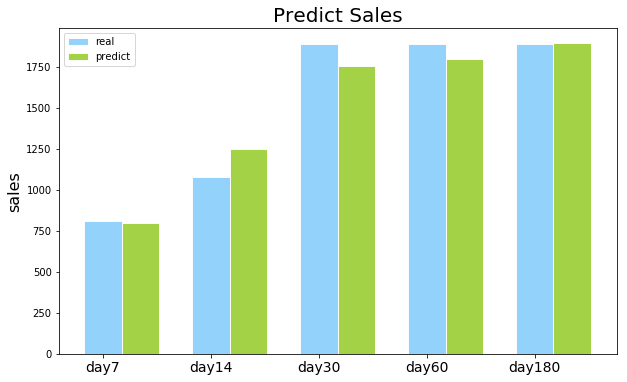

In [232]:
X = np.arange(5)+1 
y1=concatable['real'].values
y2=concatable['pred'].values
plt.figure(figsize=(10, 6))
plt.ylabel('sales', fontsize=16)
plt.bar(X, y1, alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='real', lw=1)
plt.bar(X+0.35, y2, alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='predict', lw=1)
plt.legend(loc="upper left") # label的位置在左上，没有这句会找不到label去哪了
plt.title('Predict Sales',fontsize=20)
plt.xticks(range(1,6),('day7','day14','day30','day60','day180'),fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 15})




In [130]:
subtotal[subtotal.index==10883]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
10883,1794.0,1266.33728,2990.0,2675.572998,2990.0,2776.254883,2990.0,2838.555176,2990.0,2963.175537,2990.0,2995.011963,527.66272,314.427002,213.745117,151.444824,26.824463,5.011963


In [125]:
subtotal[subtotal.index==16975]

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
16975,1540.0,1345.140747,3080.0,2221.130127,3080.0,2580.395264,3080.0,2889.798096,3080.0,2974.344238,3080.0,3084.175293,194.859253,858.869873,499.604736,190.201904,105.655762,4.175293


In [97]:
pd.options.display.max_rows = 100

#27673
#26100
#27028
#25226
#25746
#8171
#10883
#16975
subtotal.sort_values(by='bias_all').head(100)

,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days,real_totalguid,pred_totalguid,bias_7days,bias_14days,bias_30days,bias_60days,bias_180days,bias_all
16263,0.0,0.000000,436.0,194.456848,436.0,299.319061,436.0,369.909088,436.0,382.770111,436.0,435.944153,12.391638,241.543152,136.680939,66.090912,53.229889,0.055847
14085,898.0,0.000000,898.0,0.000000,898.0,636.005676,898.0,864.643005,898.0,874.529968,898.0,898.062866,858.932659,807.897148,261.994324,33.356995,23.470032,0.062866
37364,0.0,476.877045,0.0,772.655273,1520.0,1339.362061,1520.0,1355.413330,1520.0,1406.289307,1520.0,1519.896118,476.877045,772.655273,180.637939,164.586670,113.710693,0.103882
11325,0.0,0.000000,0.0,0.000000,0.0,160.931976,2180.0,1461.831665,3270.0,4804.714355,5450.0,5449.887695,4.835246,60.448261,160.931976,718.168335,1534.714355,0.112305
26100,1497.0,313.538116,1996.0,988.189453,2495.0,1409.802612,2495.0,1943.004883,2495.0,2047.131836,2495.0,2494.838623,1183.461884,1007.810547,1085.197388,551.995117,447.868164,0.161377
13115,0.0,0.000000,266.0,296.006409,665.0,513.826904,665.0,578.726501,665.0,605.955139,665.0,665.306946,66.051407,30.006409,151.173096,86.273499,59.044861,0.306946
23491,0.0,0.000000,336.0,118.163910,336.0,191.327774,336.0,314.901123,336.0,318.313049,336.0,335.640625,70.374626,217.836090,144.672226,21.098877,17.686951,0.359375
27028,1335.0,1527.948364,1335.0,1581.958984,2670.0,2172.056152,2670.0,2458.598877,2670.0,2491.066406,2670.0,2670.421631,192.948364,246.958984,497.943848,211.401123,178.933594,0.421631
13315,0.0,210.172226,869.0,1624.976196,2607.0,1731.707275,2607.0,1863.808838,2607.0,2506.573242,2607.0,2607.477051,210.172226,755.976196,875.292725,743.191162,100.426758,0.477051
32544,2097.0,153.525772,2796.0,208.966736,2796.0,1643.634521,2796.0,1650.618652,2796.0,2660.548584,2796.0,2795.510498,1943.474228,2587.033264,1152.365479,1145.381348,135.451416,0.489502


In [94]:
subtotal.to_csv("subtotal_output.csv",index=False)

In [61]:
import pickle #pickle模块

with open('save/xgb.pickle', 'wb') as f:
    pickle.dump(model, f)


In [60]:
subtotal

,real_totalguid,pred_totalguid,real_7days,pred_7days,real_14days,pred_14days,real_30days,pred_30days,real_60days,pred_60days,real_180days,pred_180days
0,30566.0,13453.342773,16182.0,4849.603516,20677.0,6657.343750,30566.0,9655.370117,30566.0,10103.696289,30566.0,9768.012695
1,143.0,678.909241,0.0,122.020470,143.0,378.595581,143.0,895.435730,143.0,838.882935,143.0,752.006226
2,1272.0,1782.297363,1272.0,588.364624,1272.0,1254.898193,1272.0,1823.018188,1272.0,2023.024292,1272.0,1986.207642
3,10240.0,3641.411621,7680.0,847.397705,10240.0,1669.368042,10240.0,3331.343506,10240.0,3362.668945,10240.0,3577.343750
4,369.0,797.917053,369.0,148.855392,369.0,383.141022,369.0,750.080872,369.0,736.500122,369.0,825.310730
5,596.0,1035.547974,596.0,358.317810,596.0,548.748901,596.0,1220.939209,596.0,1147.806885,596.0,1240.600952
6,1200.0,4070.907227,0.0,5.992067,0.0,9.011881,600.0,544.926575,1200.0,2125.254883,1200.0,3501.398682
7,520.0,1921.973267,520.0,226.019501,520.0,605.566589,520.0,1650.664307,520.0,1623.092529,520.0,1264.636108
8,2856.0,3762.876953,2856.0,1163.187988,2856.0,2383.753906,2856.0,3777.161621,2856.0,4002.146973,2856.0,3940.346924
9,78800.0,6179.671875,38415.0,888.730286,46295.0,1232.143555,71905.0,2044.489868,78800.0,3126.039551,78800.0,6465.511719


### xgb.XGBRegressor(n_estimators=200, max_depth=10)
* val_mean squared error: 415865272.28  val_mean_absolute_error: 5516.80   val_r2_score: 0.31
* 

In [ ]:
testPredY=model.predict(testX)

print("val_mean squared error: %.2f"
      % mean_squared_error(testY, testPredY))

    print("val_mean_absolute_error: %.2f"
      % mean_absolute_error(testY, testPredY))
    print("val_r2_score: %.2f"
      % r2_score(testY,testPredY))

* 全欄位:   
    val_mean squared error : 415865272.28<br />
    val_mean_absolute_error: 5516.80<br />
    val_r2_score: 0.31<br />

## 嘗試刪除code_max相關

In [221]:
totaldf=pd.merge(df,target,how='inner')
target_df=totaldf[targetcolumns].drop(columns='business_hour_guid')
totaldf=totaldf.drop(columns=targetcolumns)
catcol=['installment_3months', 'installment_6months', 'installment_12months','enable_isp', 
    'product_launch_month','is_Presales', 'is_Discount', 'is_Longtern','product_launch_hour', 
    'product_launch_weekday', 'order_deliver_days','product_launch_year']
concol=['unit_price', 'category_unit_price', 'compare_cate_unit_price', 
       'hottimes','shippingdate', 'code_before14days_mean', 'code_before180days_mean',
       'code_before30days_mean', 'code_before60days_mean',
       'code_before7days_mean', 'code_before14days_median',
       'code_before180days_median', 'code_before30days_median',
       'code_before60days_median', 'code_before7days_median',
       'code_before14days_max', 'code_before180days_max',
       'code_before30days_max', 'code_before60days_max',
       'code_before7days_max', 'code_before14days_min',
       'code_before180days_min', 'code_before30days_min',
       'code_before60days_min', 'code_before7days_min', 'code_mean_7days',
       'code_max_7days', 'code_min_7days', 'code_median_7days',
       'code_mean_14days', 'code_max_14days', 'code_min_14days',
       'code_median_14days', 'code_mean_30days', 'code_max_30days',
       'code_min_30days', 'code_median_30days', 'code_mean_60days',
       'code_max_60days', 'code_min_60days', 'code_median_60days',
       'code_mean_180days', 'code_max_180days', 'code_min_180days',
       'code_median_180days', 'parent_code_mean_7days',
       'parent_code_max_7days', 'parent_code_min_7days',
       'parent_code_median_7days', 'parent_code_mean_14days',
       'parent_code_max_14days', 'parent_code_min_14days',
       'parent_code_median_14days', 'parent_code_mean_30days',
       'parent_code_max_30days', 'parent_code_min_30days',
       'parent_code_median_30days', 'parent_code_mean_60days',
       'parent_code_max_60days', 'parent_code_min_60days',
       'parent_code_median_60days', 'parent_code_mean_180days',
       'parent_code_max_180days', 'parent_code_min_180days',
       'parent_code_median_180days', 'parent_code_counts', 'code_counts',
       'orig_unit_price','item_orig_price', 'item_price', 'quantity_multiplier']

tarcol=['guidtotal_all', 'guidtotal_7days', 'guidtotal_14days',
       'guidtotal_30days', 'guidtotal_60days', 'guidtotal_180days']

#取log
#totaldf[concol]=np.log1p(totaldf[concol])
target_df[tarcol]=np.log1p(target_df[tarcol])
totaldf.shippingdate=totaldf.shippingdate.fillna(0)
totaldf['price_gap']=totaldf['orig_unit_price']-totaldf['unit_price']
totaldf['order_deliver_days']=totaldf['order_deliver_days'].fillna(0)

In [205]:
totaldfv2=totaldf.drop(columns=['code_mean_7days',
       'code_max_7days', 'code_min_7days', 'code_median_7days',
       'code_mean_14days', 'code_max_14days', 'code_min_14days',
       'code_median_14days', 'code_mean_30days', 'code_max_30days',
       'code_min_30days', 'code_median_30days', 'code_mean_60days',
       'code_max_60days', 'code_min_60days', 'code_median_60days',
       'code_mean_180days', 'code_max_180days', 'code_min_180days',
       'code_median_180days', 'parent_code_mean_7days',
       'parent_code_max_7days', 'parent_code_min_7days',
       'parent_code_median_7days', 'parent_code_mean_14days',
       'parent_code_max_14days', 'parent_code_min_14days',
       'parent_code_median_14days', 'parent_code_mean_30days',
       'parent_code_max_30days', 'parent_code_min_30days',
       'parent_code_median_30days', 'parent_code_mean_60days',
       'parent_code_max_60days', 'parent_code_min_60days',
       'parent_code_median_60days', 'parent_code_mean_180days',
       'parent_code_max_180days', 'parent_code_min_180days',
       'parent_code_median_180days'])

In [185]:
totaldfv2.head()

,item_orig_price,item_price,quantity_multiplier,installment_3months,installment_6months,installment_12months,shippingdate,enable_isp,product_launch_month,product_launch_hour,product_launch_weekday,order_deliver_days,is_Presales,product_launch_year,unit_price,is_Longtern,category_unit_price,compare_cate_unit_price,is_Discount,hottimes,code_before14days_mean,code_before180days_mean,code_before30days_mean,code_before60days_mean,code_before7days_mean,code_before14days_median,code_before180days_median,code_before30days_median,code_before60days_median,code_before7days_median,code_before14days_max,code_before180days_max,code_before30days_max,code_before60days_max,code_before7days_max,code_before14days_min,code_before180days_min,code_before30days_min,code_before60days_min,code_before7days_min,parent_code_counts,code_counts,orig_unit_price,price_gap
0,7.848153,7.002156,1.098612,1,0,0,0.0,0,7,7,2,0,0,2016,6.309918,1,5.991465,0.865418,1,0.0,7.153265,7.153265,7.153265,7.153265,7.153265,6.37332,6.37332,6.37332,6.37332,6.37332,9.996841,9.996841,9.996841,9.996841,9.996841,4.997212,4.997212,4.997212,4.997212,4.997212,7.869784,7.787797,7.155396,0.845478
1,6.673298,6.538140,0.693147,1,0,0,0.0,0,7,7,2,0,0,2016,6.538140,0,5.991465,1.003935,1,0.0,7.153265,7.153265,7.153265,7.153265,7.153265,6.37332,6.37332,6.37332,6.37332,6.37332,9.996841,9.996841,9.996841,9.996841,9.996841,4.997212,4.997212,4.997212,4.997212,4.997212,7.869784,7.787797,6.673298,0.135158
2,6.792344,5.638355,0.693147,1,1,1,0.0,0,7,7,2,0,0,2016,5.638355,0,5.991465,0.531804,1,0.0,7.153265,7.153265,7.153265,7.153265,7.153265,6.37332,6.37332,6.37332,6.37332,6.37332,9.996841,9.996841,9.996841,9.996841,9.996841,4.997212,4.997212,4.997212,4.997212,4.997212,7.869784,7.787797,6.792344,1.153990
3,7.848153,7.021976,1.098612,1,0,0,0.0,0,7,7,0,0,0,2016,6.329721,0,5.991465,0.877134,1,0.0,7.153265,7.153265,7.153265,7.153265,7.153265,6.37332,6.37332,6.37332,6.37332,6.37332,9.996841,9.996841,9.996841,9.996841,9.996841,4.997212,4.997212,4.997212,4.997212,4.997212,7.869784,7.787797,7.155396,0.825675
4,7.599401,6.680855,1.609438,1,1,1,0.0,0,6,7,3,0,0,2016,5.298317,0,5.991465,0.404798,1,0.0,7.153265,7.153265,7.153265,7.153265,7.153265,6.37332,6.37332,6.37332,6.37332,6.37332,9.996841,9.996841,9.996841,9.996841,9.996841,4.997212,4.997212,4.997212,4.997212,4.997212,7.869784,7.787797,6.214608,0.916291


In [207]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
targetname='guidtotal_all'
#model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100))
model=xgb.XGBRegressor(n_estimators=200,max_depth=10)
target_input=target_df[targetname]
trainmodel(totaldfv2,target_input,model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 0.90
val_mean_absolute_error: 0.74
val_r2_score: 0.51


In [208]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
targetname='guidtotal_7days'
#model = MultiOutputRegressor(xgb.XGBRegressor(n_estimators=100))
model=xgb.XGBRegressor(n_estimators=200,max_depth=10)
target_input=target_df[targetname]
trainmodel(totaldfv2,target_input,model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 7.99
val_mean_absolute_error: 2.22
val_r2_score: 0.41


In [121]:
# target list
tarcol
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
modellist=[xgb.XGBRegressor(n_estimators=200,max_depth=10),Ridge(alpha=0.01,max_iter=None,tol=0.1),
DecisionTreeRegressor(random_state=0),RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)]
#df
dflist=[totaldf]

In [216]:
for target in tarcol:
    print(target)

guidtotal_all
guidtotal_7days
guidtotal_14days
guidtotal_30days
guidtotal_60days
guidtotal_180days


In [214]:

for model in modellist:
    for target in tarcol:
        target_input=target_df[target]
        trainmodel(totaldfv2,target_input,model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 0.90
val_mean_absolute_error: 0.74
val_r2_score: 0.51
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 7.99
val_mean_absolute_error: 2.22
val_r2_score: 0.41
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       col

### 只使用before days

[guidtotal_all]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 0.89
val_mean_absolute_error: 0.74
val_r2_score: 0.51

[guidtotal_7days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 7.90
val_mean_absolute_error: 2.20
val_r2_score: 0.42

[guidtotal_14days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 5.75
val_mean_absolute_error: 1.72
val_r2_score: 0.48

[guidtotal_30days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 3.74
val_mean_absolute_error: 1.33
val_r2_score: 0.50

[guidtotal_60days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 2.79
val_mean_absolute_error: 1.10
val_r2_score: 0.46

[guidtotal_180days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 1.58
val_mean_absolute_error: 0.85
val_r2_score: 0.43

[guidtotal_all]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 1.19
val_mean_absolute_error: 0.86
val_r2_score: 0.35

[guidtotal_7days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 9.70
val_mean_absolute_error: 2.55
val_r2_score: 0.28

[guidtotal_14days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 7.52
val_mean_absolute_error: 2.09
val_r2_score: 0.32

[guidtotal_30days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 5.12
val_mean_absolute_error: 1.63
val_r2_score: 0.32

[guidtotal_60days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 3.90
val_mean_absolute_error: 1.31
val_r2_score: 0.24

[guidtotal_180days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 2.12
val_mean_absolute_error: 0.97
val_r2_score: 0.24

[guidtotal_all]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 1.19
val_mean_absolute_error: 0.86
val_r2_score: 0.35

[guidtotal_7days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 9.70
val_mean_absolute_error: 2.55
val_r2_score: 0.28

[guidtotal_14days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 7.52
val_mean_absolute_error: 2.09
val_r2_score: 0.32

[guidtotal_30days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 5.12
val_mean_absolute_error: 1.63
val_r2_score: 0.32

[guidtotal_60days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 3.90
val_mean_absolute_error: 1.31
val_r2_score: 0.24

[guidtotal_1800days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 2.12
val_mean_absolute_error: 0.97
val_r2_score: 0.24

In [122]:
for model in modellist:
    for target in tarcol:
        target_input=target_df[target]
        trainmodel(totaldf,target_input,model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 0.89
val_mean_absolute_error: 0.74
val_r2_score: 0.51
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 7.90
val_mean_absolute_error: 2.20
val_r2_score: 0.42
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       col

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
val_mean squared error: 2.38
val_mean_absolute_error: 1.05
val_r2_score: 0.14


### 使用全欄位

[guidtotal_all]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 0.89
val_mean_absolute_error: 0.74
val_r2_score: 0.51

[guidtotal_7days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 7.90
val_mean_absolute_error: 2.20
val_r2_score: 0.42

[guidtotal_14days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 5.75
val_mean_absolute_error: 1.72
val_r2_score: 0.48

[guidtotal_30days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 3.74
val_mean_absolute_error: 1.33
val_r2_score: 0.50

[guidtotal_60days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 2.79
val_mean_absolute_error: 1.10
val_r2_score: 0.46

[guidtotal_180days]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
val_mean squared error: 1.58
val_mean_absolute_error: 0.85
val_r2_score: 0.43

[guidtotal_all]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 1.19
val_mean_absolute_error: 0.86
val_r2_score: 0.35

[guidtotal_7days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 9.70
val_mean_absolute_error: 2.55
val_r2_score: 0.28

[guidtotal_14days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 7.52
val_mean_absolute_error: 2.09
val_r2_score: 0.32

[guidtotal_30days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 5.12
val_mean_absolute_error: 1.63
val_r2_score: 0.32

[guidtotal_60days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 3.90
val_mean_absolute_error: 1.31
val_r2_score: 0.24

[guidtotal_180days]

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.1)
val_mean squared error: 2.12
val_mean_absolute_error: 0.97
val_r2_score: 0.24

[guidtotal_all]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 1.19
val_mean_absolute_error: 0.86
val_r2_score: 0.35

[guidtotal_7days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 9.70
val_mean_absolute_error: 2.55
val_r2_score: 0.28

[guidtotal_14days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 7.52
val_mean_absolute_error: 2.09
val_r2_score: 0.32

[guidtotal_30days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 5.12
val_mean_absolute_error: 1.63
val_r2_score: 0.32

[guidtotal_60days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 3.90
val_mean_absolute_error: 1.31
val_r2_score: 0.24

[guidtotal_180days]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
val_mean squared error: 2.12
val_mean_absolute_error: 0.97
val_r2_score: 0.24

In [274]:
##Use MinMaxScaler
target_df[tarcol]=np.log1p(target_df[tarcol])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
for m in modellist:
    for t in tarcol:
        target_input=target_df[t]
        trainX,testX,trainY,testY=train_test_split(totaldf,target_input, test_size=0.2, random_state=42)
        scaler=MinMaxScaler(feature_range=(0,1))
        totaldf=scaler.fit_transform(totaldf)
        model=m
        model.fit(trainX,trainY)
        predY=model.predict(testX)
        print(f'{model}:{t}')
        print("val_mean squared error: %.2f"
          % mean_squared_error(testY, predY))

        print("val_mean_absolute_error: %.2f"
          % mean_absolute_error(testY, predY))
        print("val_r2_score: %.2f"
          % r2_score(testY,predY))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1):guidtotal_all
val_mean squared error: 0.01
val_mean_absolute_error: 0.08
val_r2_score: 0.52
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1):guidtotal_7days
val_mean squared error: 0.62
val_mean_absolute_error: 0.60
val_r2_score: 0.39
XGBRegressor(base_score=0.5, booster='gbtree', c

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').